In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
data=pd.read_csv('adult.csv')

In [7]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


Проверяем на нули

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
gender             48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Отлично, нулей нет) смотрим на БД в целом, у нас есть категориальные признаки, можно попробовать трансформировать их, в том числе наш таргет

In [9]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
le.fit( data['income'])

LabelEncoder()

In [12]:
le.classes_

array(['<=50K', '>50K'], dtype=object)

In [13]:
data['income']=le.transform(data['income'])

In [14]:
Cat=data.drop(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],axis=1)

In [15]:
data_new=data[data.describe().columns]

А вот и пропущенные значения '?'. Попробуем закодировать все переменные, как вероятность нахождения каждого значения во всем дата сете.

In [16]:
Cat.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,0
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,0
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,1
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,1
4,?,Some-college,Never-married,?,Own-child,White,Female,United-States,0


In [17]:
Cat.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

In [18]:
for i in ['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country']:
    prob_df=Cat.groupby(i)['income'].count().reset_index()
    prob_df=pd.DataFrame(prob_df)
    a=int(prob_df['income'].sum())
    b=str(str(i)+'_Prob')
    prob_df=prob_df.rename(columns={'income':b})
    prob_df[b]=(prob_df[b]/a)
    Cat=Cat.merge(prob_df[[i,b]], how='left', on=i)
    del Cat[i]

In [19]:
del Cat['income']

In [20]:
Cat.head()

,workclass_Prob,education_Prob,marital-status_Prob,occupation_Prob,relationship_Prob,race_Prob,gender_Prob,native-country_Prob
0,0.694198,0.037099,0.329982,0.061873,0.155215,0.095922,0.668482,0.897424
1,0.694198,0.323164,0.458192,0.030507,0.403669,0.855043,0.668482,0.897424
2,0.064207,0.032779,0.458192,0.020126,0.403669,0.855043,0.668482,0.897424
3,0.694198,0.222718,0.458192,0.061873,0.403669,0.095922,0.668482,0.897424
4,0.057307,0.222718,0.329982,0.057512,0.155215,0.855043,0.331518,0.897424


In [21]:
data=pd.concat([data_new,Cat],axis=1)

In [22]:
corr=data.corr()

In [24]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20

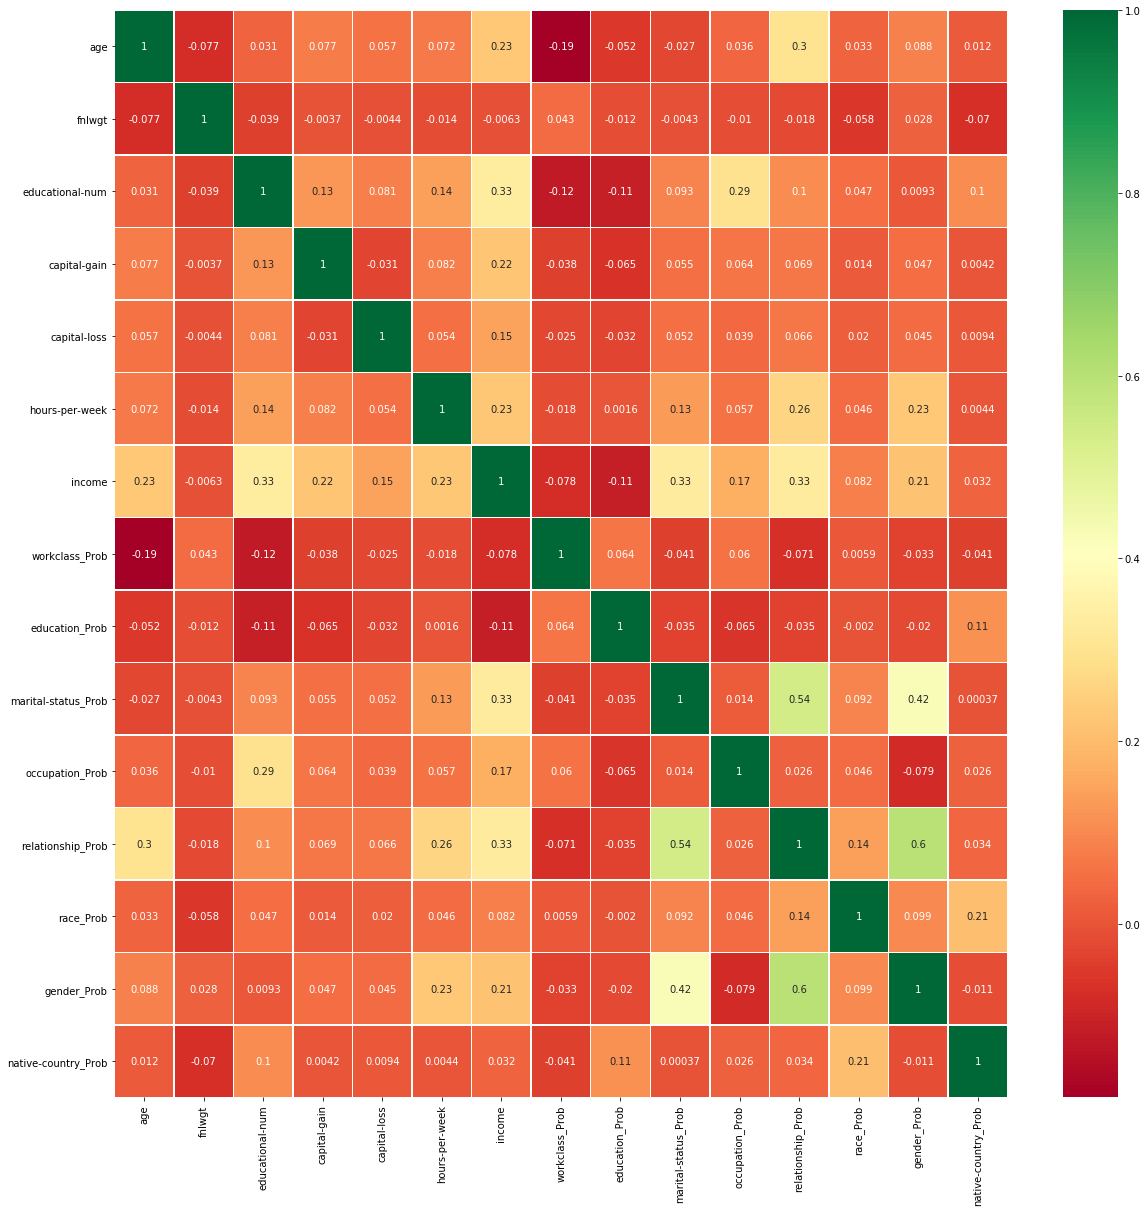

In [25]:
sns.heatmap(corr, annot=True,cmap='RdYlGn',linewidths=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA3CCE7DD8>,
      dtype=object)

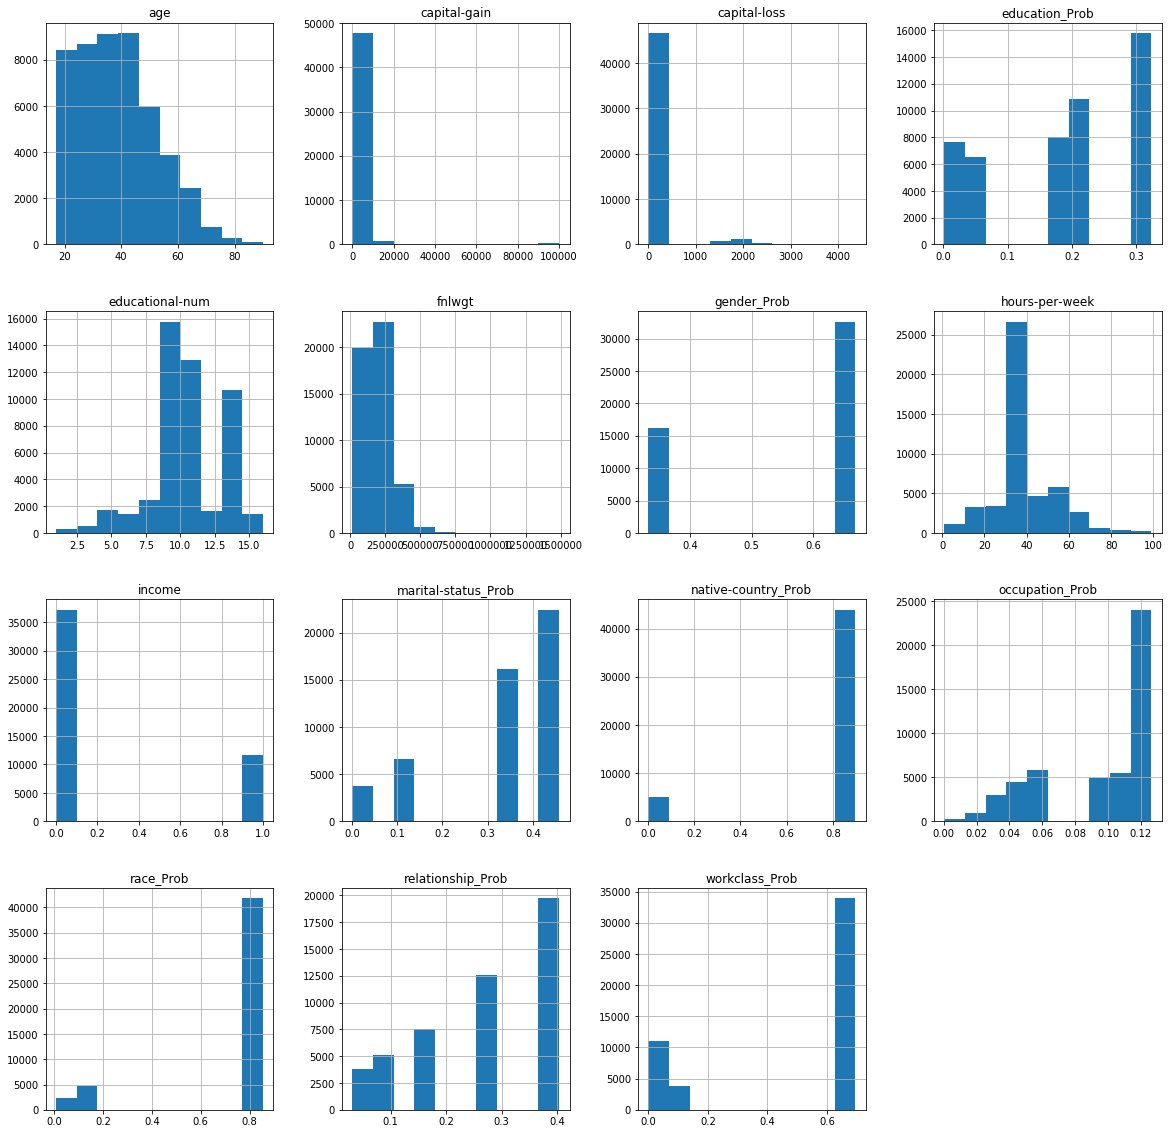

In [26]:
data.hist()

Видим, что таргет не сбалансирован. Исправим это

In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
X=np.array(data.drop('income',axis=1))
y=np.array(data['income'])

In [29]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [30]:
len(X)

48842

In [31]:
len(X_res)

23374

In [32]:
new_df=np.append(X_res,y_res[:,None],axis=1)

In [33]:
data.columns

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Prob', 'education_Prob',
       'marital-status_Prob', 'occupation_Prob', 'relationship_Prob',
       'race_Prob', 'gender_Prob', 'native-country_Prob'],
      dtype='object')

In [34]:
new_df=pd.DataFrame(new_df,columns=['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Prob', 'education_Prob',
       'marital-status_Prob', 'occupation_Prob', 'relationship_Prob',
       'race_Prob', 'gender_Prob', 'native-country_Prob', 'income'])

Проверяем все еще раз:

In [35]:
corr=new_df.corr()

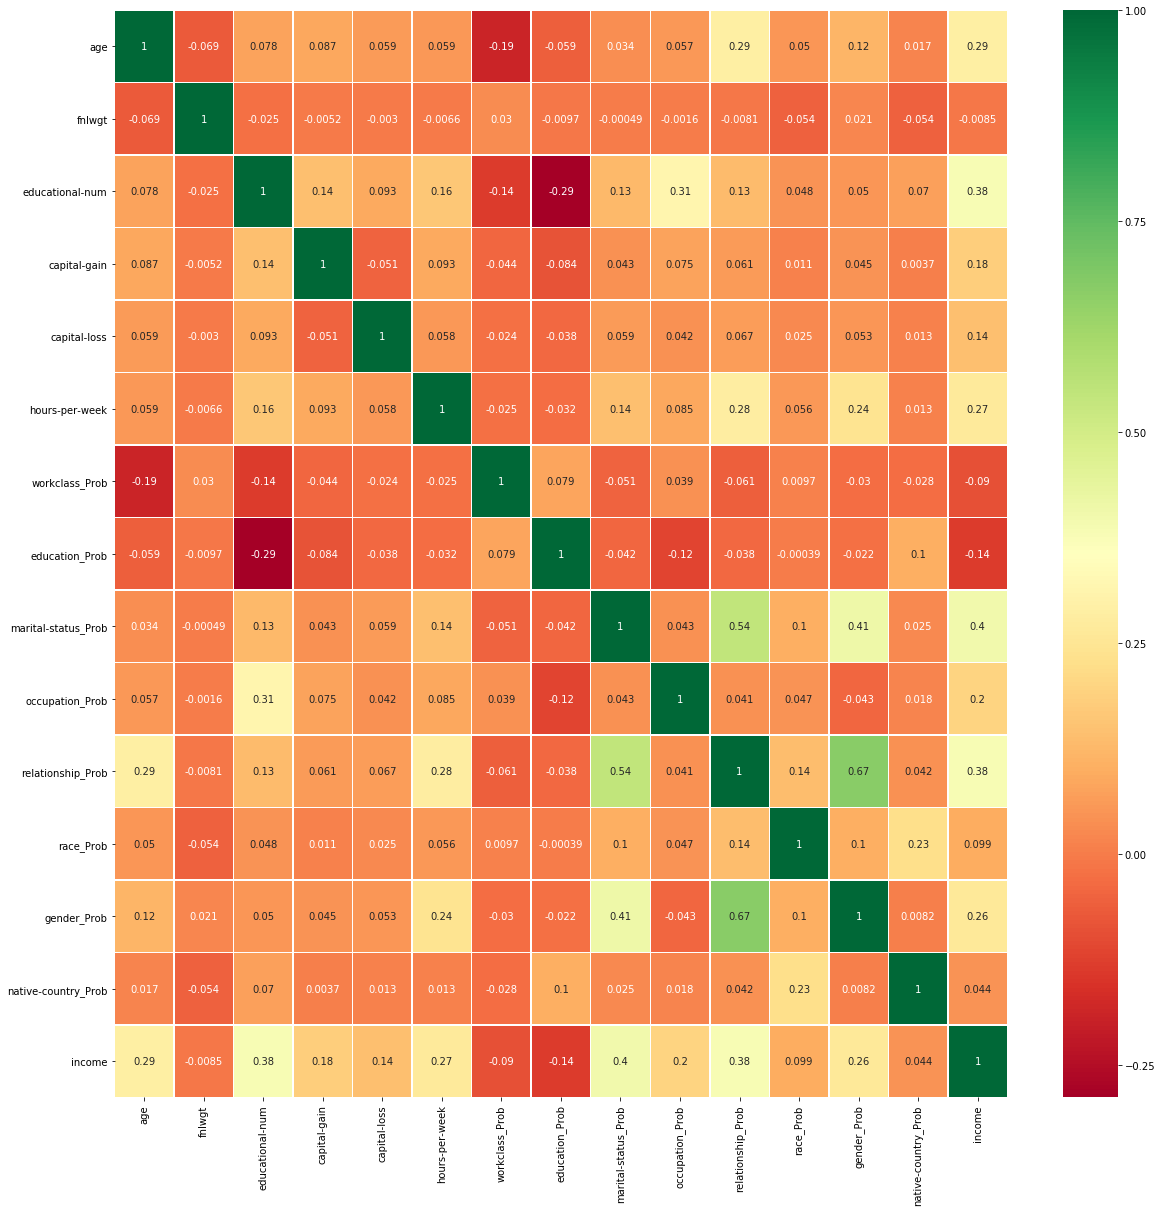

In [36]:
sns.heatmap(corr, annot=True,cmap='RdYlGn',linewidths=0.5)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EA42137E48>,
      dtype=object)

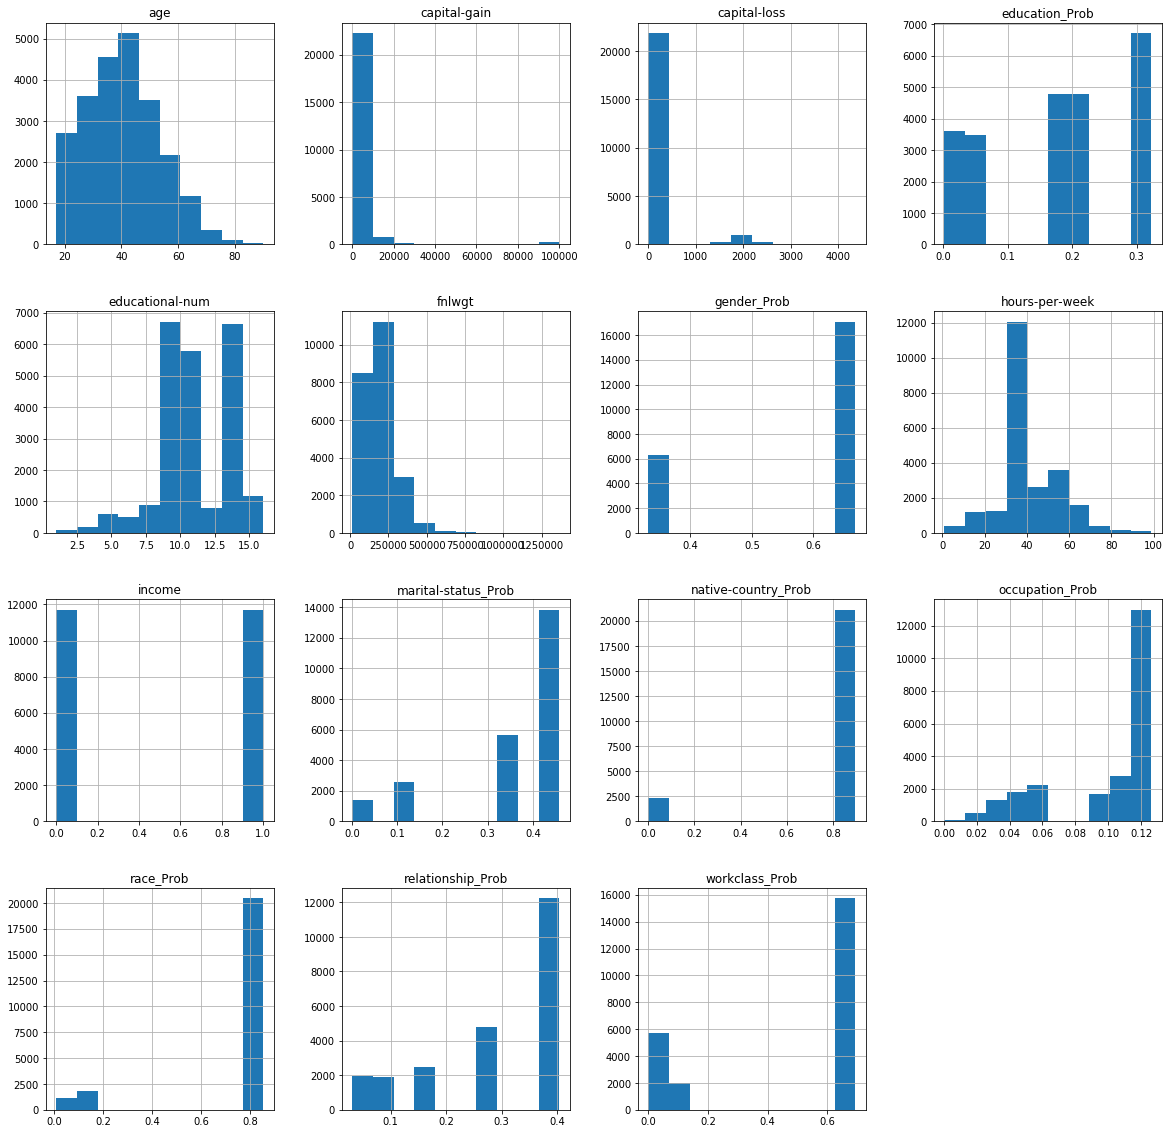

In [37]:
new_df.hist()

In [38]:
X=np.array(new_df.drop('income',axis=1))
y=np.array(new_df['income'])

In [39]:
from sklearn.linear_model import LassoLarsCV

# Подбор параметров 

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
X=new_df.drop('income',axis=1)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [50]:
X_train_scaled=scaler.fit_transform(X_train)

In [51]:
X_test_scaled=scaler.fit_transform(X_test)

In [52]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# custom_feature_names=feature_names


sfs_forward = SFS(model, 
           k_features=14, 
           forward=True, 
           floating=True, 
           verbose=1,
           scoring='roc_auc',
           cv=skf,
           n_jobs=-1)

sfs_forward = sfs_forward.fit(X_train_scaled, y_train,custom_feature_names=new_df.drop('income',axis=1).columns)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  14 | elapsed:    0.9s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed:    1.1s finished
Features: 1/14[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  13 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/14[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  12 | elapsed:    0.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0

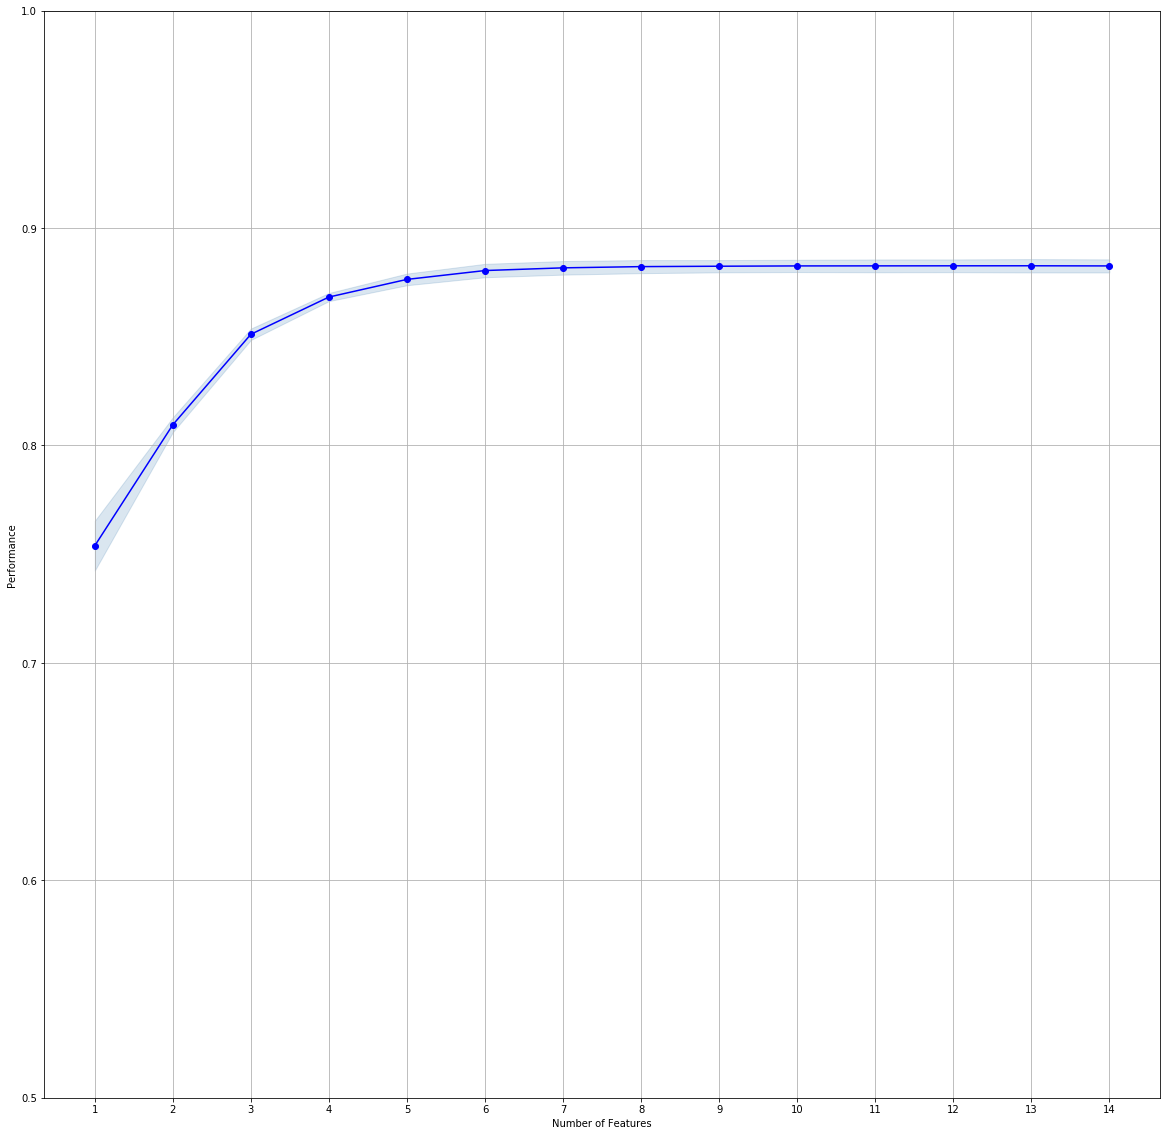

In [53]:
fig1 = plot_sfs(sfs_forward.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 1])
# plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [54]:
sfs_forward.get_metric_dict()

{1: {'feature_idx': (8,),
  'cv_scores': array([0.76095491, 0.73469147, 0.76390649, 0.75609583]),
  'avg_score': 0.7539121774611758,
  'feature_names': ('marital-status_Prob',),
  'ci_bound': 0.018341538116328767,
  'std_dev': 0.011442140832162911,
  'std_err': 0.0066061230895548655},
 2: {'feature_idx': (2, 8),
  'cv_scores': array([0.80631469, 0.80605443, 0.81370545, 0.81207063]),
  'avg_score': 0.8095362987899274,
  'feature_names': ('educational-num', 'marital-status_Prob'),
  'ci_bound': 0.005454073349747261,
  'std_dev': 0.0034024559434956427,
  'std_err': 0.0019644088548830515},
 3: {'feature_idx': (2, 3, 8),
  'cv_scores': array([0.84989046, 0.84747257, 0.85362839, 0.8535968 ]),
  'avg_score': 0.851147056587666,
  'feature_names': ('educational-num', 'capital-gain', 'marital-status_Prob'),
  'ci_bound': 0.0041830723151764304,
  'std_dev': 0.002609557728354288,
  'std_err': 0.0015066288569312164},
 4: {'feature_idx': (0, 2, 3, 8),
  'cv_scores': array([0.86714798, 0.86578429, 0.

In [55]:
columns_=['age',
   'educational-num',
   'capital-gain',
   'capital-loss',
   'hours-per-week',
   'marital-status_Prob',
   'occupation_Prob']

In [56]:
X=np.array(new_df[columns_])
y=np.array(new_df['income'])

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [58]:
cs = 10**np.linspace(-3,1,5)
cs
grid = {'C': cs}
gridsearch = GridSearchCV(LogisticRegression(), grid, scoring='roc_auc', cv=5)
gridsearch.fit(X_train, y_train)
best=gridsearch.best_params_['C']

c:\users\korostylev.v\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\korostylev.v\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\korostylev.v\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\korostylev.v\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\korostylev.v\appdata\lo

In [59]:
model = LogisticRegression(C=best)

In [60]:
model.fit(X_train_scaled, y_train)

c:\users\korostylev.v\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_train_predict = model.predict(X_train_scaled)

In [62]:
y_test_predict = model.predict(X_test_scaled)

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

In [64]:
#Рассчет roc_auc_score для трейна
roc_auc_train = np.round(roc_auc_score(y_train, y_train_predict), 2)
#Рассчет roc_auc_score для теста
roc_auc_test = np.round(roc_auc_score(y_test, y_test_predict), 2)

print("Train: ", roc_auc_train)
print("Test: ", roc_auc_test)

Train:  0.8
Test:  0.8


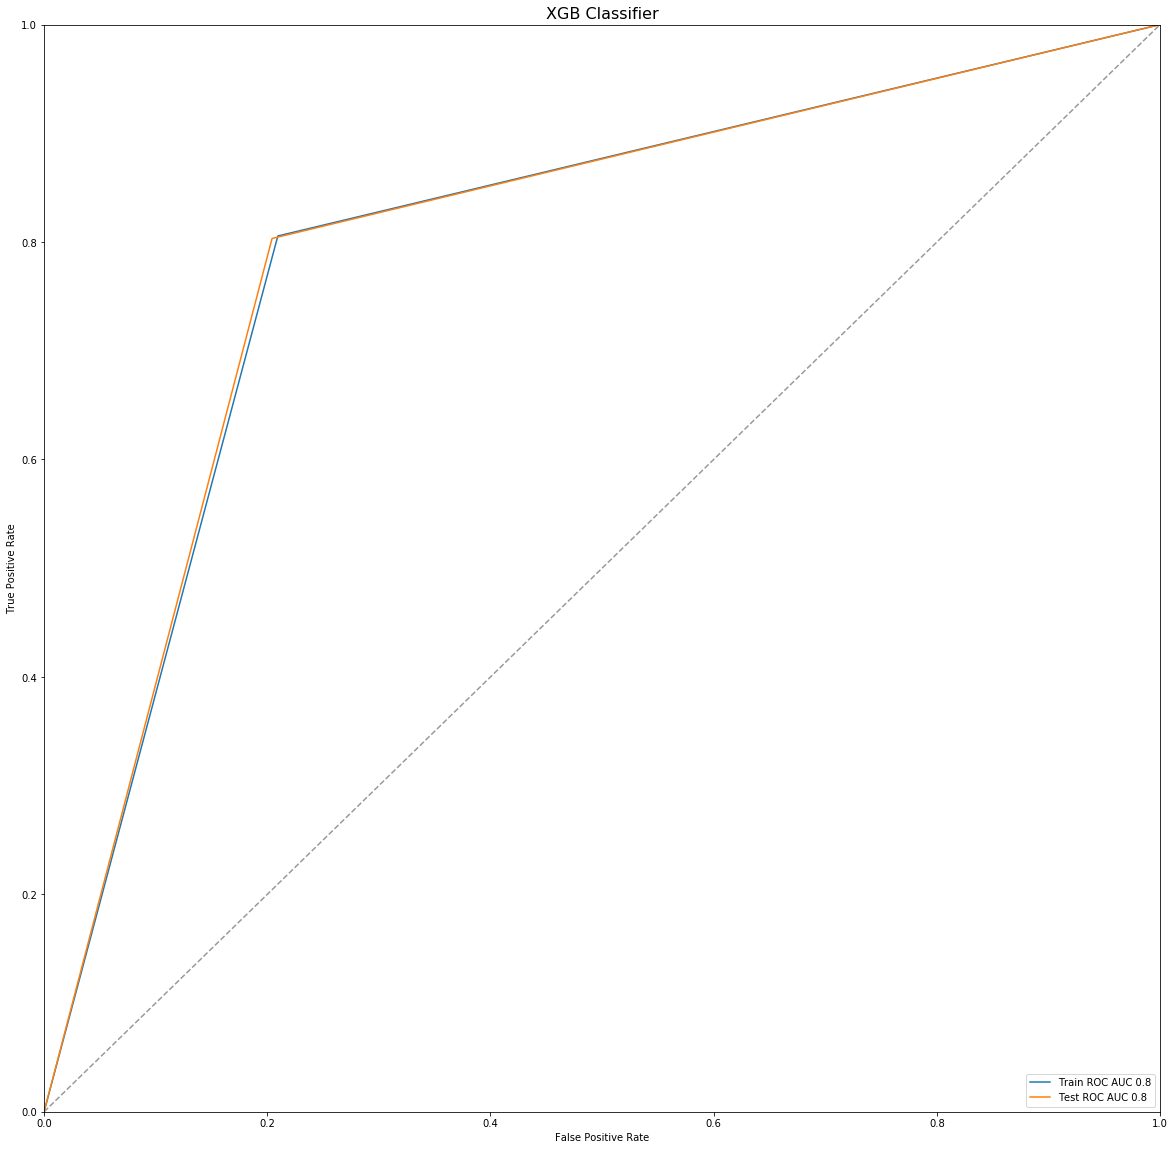

In [65]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_predict)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_predict)

plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB Classifier', size=16)
plt.legend(loc='lower right')
plt.show()